Import Package

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

%matplotlib inline
plt.rcParams["figure.figsize"] = (40.32,2.268)

Declear the symmetrical radial distortion parameters  

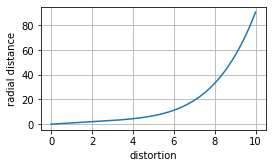

In [ ]:
k_1 = -0.00725
k_2 = 0.0008791
k_3 =  0

r = np.linspace(-0.00725,10,1000)
r_distorted = r*(1 + k_1 * r**2 + k_2 * r**4 + k_3 * r**6)

plt.xlabel('distortion')
plt.ylabel('radial distance')
plt.plot(r,r_distorted)
plt.grid()
plt.show()


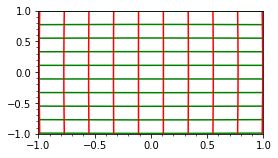

In [ ]:
def distort_line(x,y,k_1,k_2,k_3):
    r = np.sqrt(x**2 + y**2)
    x_distorted = x*(1 + k_1 * r**2 + k_2 * r**4 + k_3 * r**6)
    y_distorted = y*(1 + k_1 * r**2 + k_2 * r**4 + k_3 * r**6)
    return(x_distorted,y_distorted)

for y in np.linspace(-1,1,10):
    x = np.linspace(-1,1,1000)
    x_distorted,y_distorted = distort_line(x,y,k_1,k_2,k_3)
    plt.plot(x_distorted,y_distorted,color='green',alpha=1)
    
for x in np.linspace(-1,1,10):
    y = np.linspace(-1,1,1000)
    x_distorted,y_distorted = distort_line(x,y,k_1,k_2,k_3)
    plt.plot(x_distorted,y_distorted,color='red',alpha=1)
    
plt.minorticks_on()
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

In [ ]:
def undistort_point(undistortion_params,r_distorted):
    undistorted = r_distorted*(1 + undistortion_params[0] * r_distorted
                               + undistortion_params[1] * r_distorted**2
                               + undistortion_params[2] * r_distorted**3
                               + undistortion_params[3] * r_distorted**4
                               + undistortion_params[4] * r_distorted**5)
    return(undistorted)

def fun(undistortion_params,r_distorted):
    #Compute residuals.
    undistorted = undistort_point(undistortion_params, r_distorted)
    return((undistorted - np.linspace(0,1,1000))).ravel()

In [ ]:
x0 = np.zeros(5).ravel()
res = least_squares(fun, x0,  verbose=2, ftol=1e-12,loss='linear', args=([r_distorted]))

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.9902e+05                                    1.50e+15    
       1              2         7.6377e+02      3.98e+05       1.40e-01       4.92e+06    
       2              3         7.6377e+02      0.00e+00       0.00e+00       4.92e+06    
`xtol` termination condition is satisfied.
Function evaluations 3, initial cost 3.9902e+05, final cost 7.6377e+02, first-order optimality 4.92e+06.


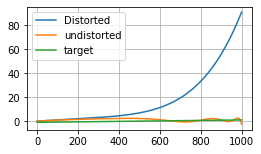

In [ ]:
undistorted = undistort_point(res.x,r_distorted)    
plt.plot(r_distorted,label='Distorted',alpha=1)
plt.plot(undistorted,label='undistorted',alpha=1)
plt.plot(np.linspace(-1,1,1000),label='target',alpha=1)
plt.legend()
plt.grid()
plt.show()


In [ ]:
print(res.x)

[-1.39463836e-01  6.82962078e-03 -1.49562264e-04  1.50391870e-06
 -5.66074856e-09]
